In [31]:
import pandas as pd
#imports

df = pd.read_excel('netpay.xlsx')
print(df.head())
#Bring in the file and check if it has loaded properly

       Month  Net Pay
0 2025-04-01   724.39
1 2025-05-01   726.10
2 2025-06-01  1015.04
3 2025-07-01   642.26
4 2025-08-01   724.04


In [32]:
#Creating a calculated field based on my hourly wage - £13.02 
df['time_worked'] = df['Net Pay'] / 13.02
print(df.head())

       Month  Net Pay  time_worked
0 2025-04-01   724.39    55.636713
1 2025-05-01   726.10    55.768049
2 2025-06-01  1015.04    77.960061
3 2025-07-01   642.26    49.328725
4 2025-08-01   724.04    55.609831


In [33]:
df['time_worked'] = df['time_worked'].round(2)
print(df.head())

       Month  Net Pay  time_worked
0 2025-04-01   724.39        55.64
1 2025-05-01   726.10        55.77
2 2025-06-01  1015.04        77.96
3 2025-07-01   642.26        49.33
4 2025-08-01   724.04        55.61


In [34]:
df['hours_worked'] = df['time_worked'].astype(int)
print(df.head())
#this gives us the hours

       Month  Net Pay  time_worked  hours_worked
0 2025-04-01   724.39        55.64            55
1 2025-05-01   726.10        55.77            55
2 2025-06-01  1015.04        77.96            77
3 2025-07-01   642.26        49.33            49
4 2025-08-01   724.04        55.61            55


In [35]:
#to get the minutes we need to multiple the part after the decimal by 60 after keeping only remainder using modulo
df['minutes'] = (df['time_worked'].mod(1) * 60).round().astype(int)
print(df.head())

       Month  Net Pay  time_worked  hours_worked  minutes
0 2025-04-01   724.39        55.64            55       38
1 2025-05-01   726.10        55.77            55       46
2 2025-06-01  1015.04        77.96            77       58
3 2025-07-01   642.26        49.33            49       20
4 2025-08-01   724.04        55.61            55       37


In [36]:
#Okay time to make a pie chart but first we need expenses (e for short)
#because we are storing expenses as their name as well as their value we need to use a dictionary
#https://www.w3schools.com/python/python_dictionaries.asp
e = {
    "Fuel" : 120,
    "Groceries" : 200,
    "Buffer": 75
}
#estimated expenses 
print(sum(e.values()))
expenses = sum(e.values())

395


In [37]:
#Time to take net_pay from expenses
df['remainder'] = df['Net Pay'] - expenses
df['expenses'] = expenses
print(df.head())

       Month  Net Pay  time_worked  hours_worked  minutes  remainder  expenses
0 2025-04-01   724.39        55.64            55       38     329.39       395
1 2025-05-01   726.10        55.77            55       46     331.10       395
2 2025-06-01  1015.04        77.96            77       58     620.04       395
3 2025-07-01   642.26        49.33            49       20     247.26       395
4 2025-08-01   724.04        55.61            55       37     329.04       395


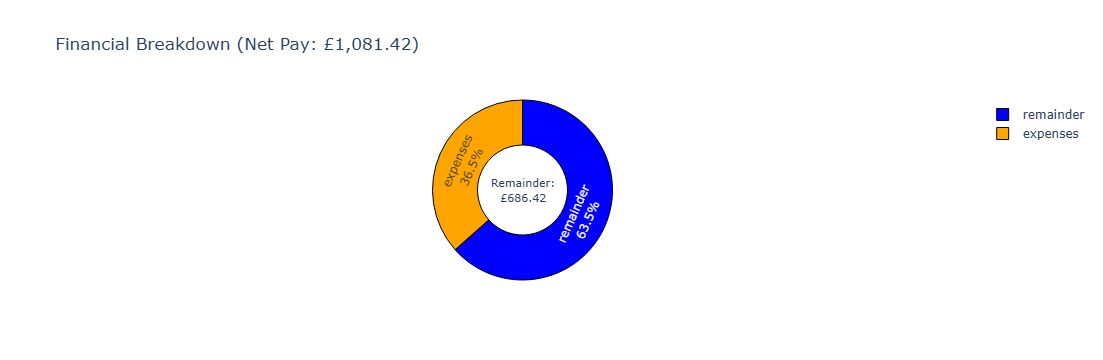

In [54]:
#to make a "dynamic" pie chart need to important a different graphing libary
import plotly.express as px

target_date_dt = pd.to_datetime('2025-09-01')
filtered_df = df[df['Month'] == target_date_dt].copy()

total_net_pay = filtered_df['Net Pay'].iloc[0]
plot_data = filtered_df.melt(
    value_vars=['remainder', 'expenses'],
    var_name='Category',
    value_name='Amount')

    #create figure
fig = px.pie(
    plot_data,
    values='Amount',
    names='Category',
    title=f"Financial Breakdown (Net Pay: £{total_net_pay:,.2f})",
    color='Category',
    # Colour blind friendly colours because it has been drilled into me
    color_discrete_map={'remainder': 'blue', 'expenses': 'orange'})

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hole=.5,  #gives room in middle for remainder
    marker=dict(line=dict(color='#000000', width=1)))
    
#Display the Net Pay in the center of the donut
fig.add_annotation(
    #show remainder as that is most important value imo
    text=f"Remainder:<br>£{(total_net_pay - expenses):,.2f}",
    x=0.5, y=0.5, font_size=11, showarrow=False)

fig.show()

In [58]:
#lets do some other calcs while here
#Net Pay sum (crazy where did it all go)
print('£' + str(sum(df['Net Pay'])))

£5619.1


In [ ]:
#lets remove all the expenses
sum_of_expenses = sum(df.['expenses'])
